# **Marketing Campaign for Banking Products**

Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

Attribute Information:

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer 

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 
   3: Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?


Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.bold text

# **Task: 1**
# **Import the datasets and libraries, check datatype,statistical summary, shape, null values etc**

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Reading the CSV file**

In [3]:
Dataset = pd.read_csv('Bank loan.csv')

## **Displaying the top 5 rows**

In [ ]:
#to display the top 5 rows
Dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# **Displaying the bottom 5 rows**

In [ ]:
Dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# **To display the dataset of each column and also display the non-null rows for each column**

In [ ]:

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# **To display the Summary stats which includes count , mean , std,min,max,etc**

In [ ]:

Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Observation

# **No Missing Values**

In [ ]:
Dataset.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# **To display how many nulls value are present in each column**

In [ ]:
Dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **Task: 2**
# **Check if you need to clean the data for any of the variable**

# **Observation**

# Column 'Experience' has negative values

# Replacing the negative values with the medium value of the column.

## **Checking wheather there is any negative in it .**

In [ ]:
any(Dataset['Experience'] < 0)

True

## **Changing the negative Value into median value**

In [ ]:
exp_med = Dataset.loc[:,"Experience"].median()
Dataset.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

# **Checking in the table** 

In [ ]:
Dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# **Checking for correlation**

In [ ]:
Dataset[['Personal_Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal_Loan,Age,Income,CCAvg,Mortgage
Personal_Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


In [ ]:
experience = Dataset['Experience']
age = Dataset['Age']
correlation = experience.corr(age)
correlation

0.9771816883703435

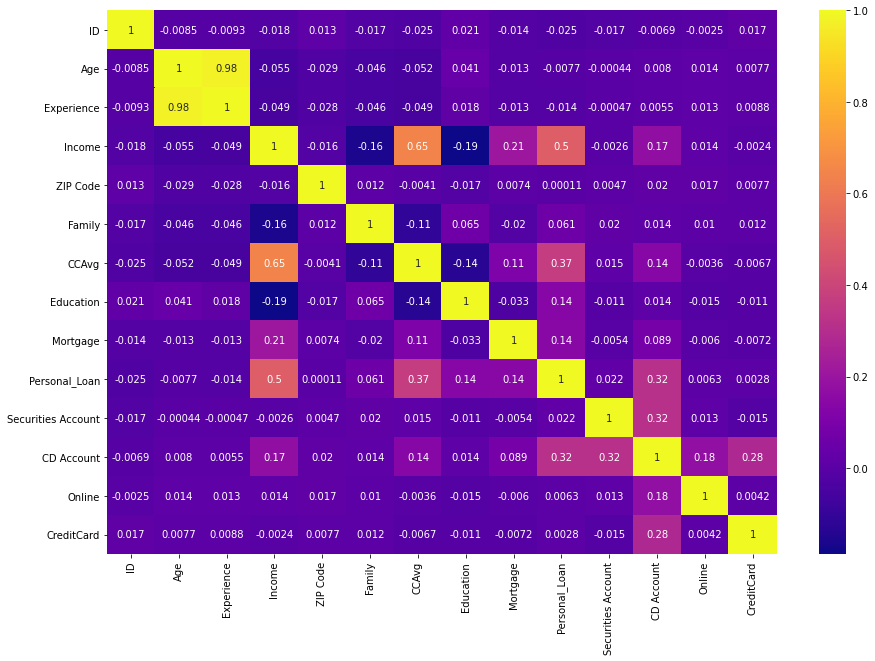

In [ ]:
Dataset.ax = plt.subplots(figsize=(15,10))
sns.heatmap(Dataset.corr(),cmap='plasma' ,annot = True)

# **Checking for information**

In [ ]:
Dataset.info

<bound method DataFrame.info of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>

# **Removing the ID**

# Checking the top 5 value

In [ ]:
Dataset = Dataset.drop(['ID'],axis=1)
Dataset.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# **Task: 3**
# **EDA: Study the data distribution in each attribute and target variable, share your findings.**

# **Number of unique in each column**

In [4]:
Dataset.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# **Number of people with zero mortgage**



In [ ]:
(Dataset.Mortgage == 0).sum()

3462

# **Number of people with  Personal loan**



In [ ]:
(Dataset.Personal_Loan ==0).sum()

4520

# **Number of people with zero credit card spending per month**

In [ ]:
(Dataset.CCAvg == 0).sum()

106

# **Value counts of Family categorical columns.**

In [ ]:
Dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

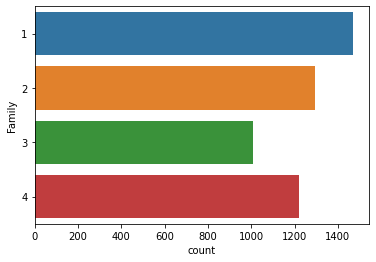

In [ ]:
sns.countplot(y='Family', data=Dataset)

In [5]:
Dataset.CCAvg.value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [6]:
Dataset.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

# **Univariate and Bivariate analysis**

# Univariable analysis

# Family

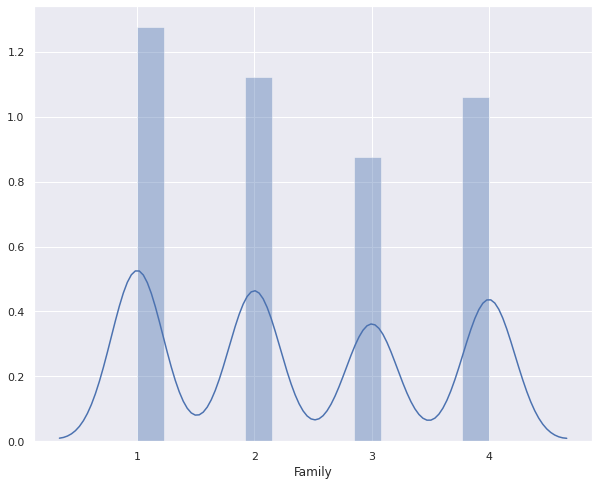

In [ ]:
#plt.figure(figsize= (25,25))
#plt.subplot(5,2,1)
sns.distplot(Dataset.Family)

# Income

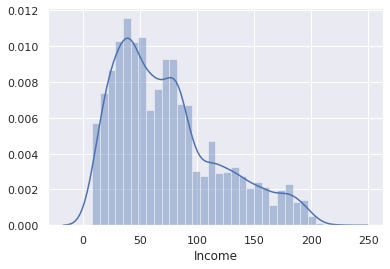

In [ ]:
sns.distplot(Dataset.Income)

# CCAVG

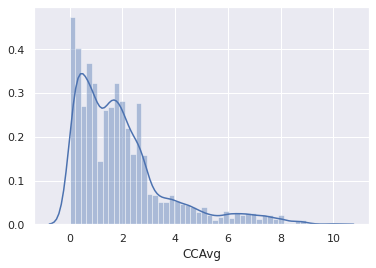

In [ ]:
sns.distplot(Dataset.CCAvg)

# Mortgage

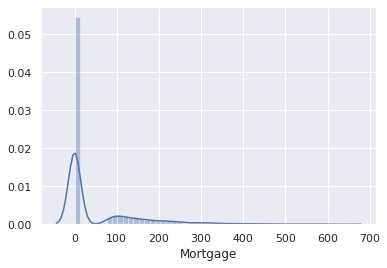

In [ ]:
sns.distplot(Dataset.Mortgage)

# **Univariate Analysis of the continuous variables**

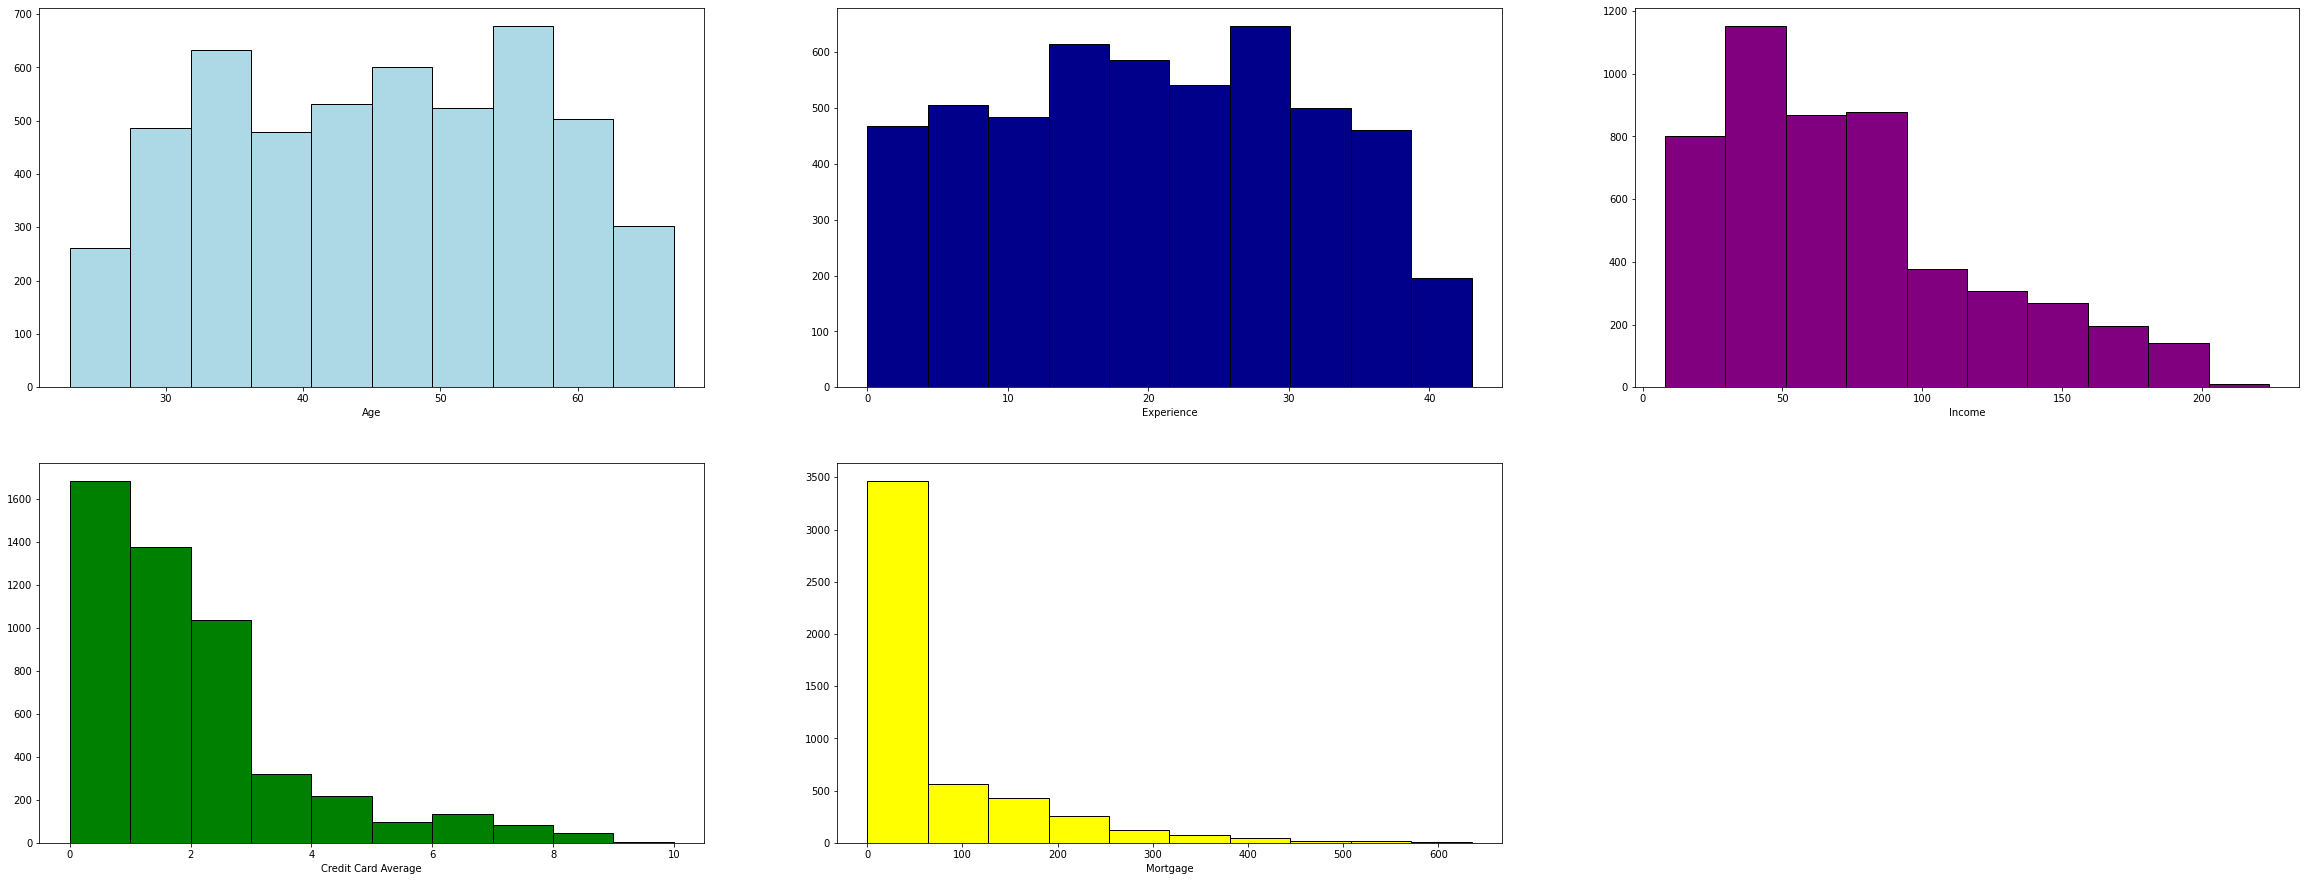

In [ ]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(Dataset.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(Dataset.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(Dataset.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(Dataset.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(Dataset.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

# Multivariate Analysis: Pair plot:

# pair plot shows a clear and nice view of all variables and their realtion ship with all other variables. Image for post


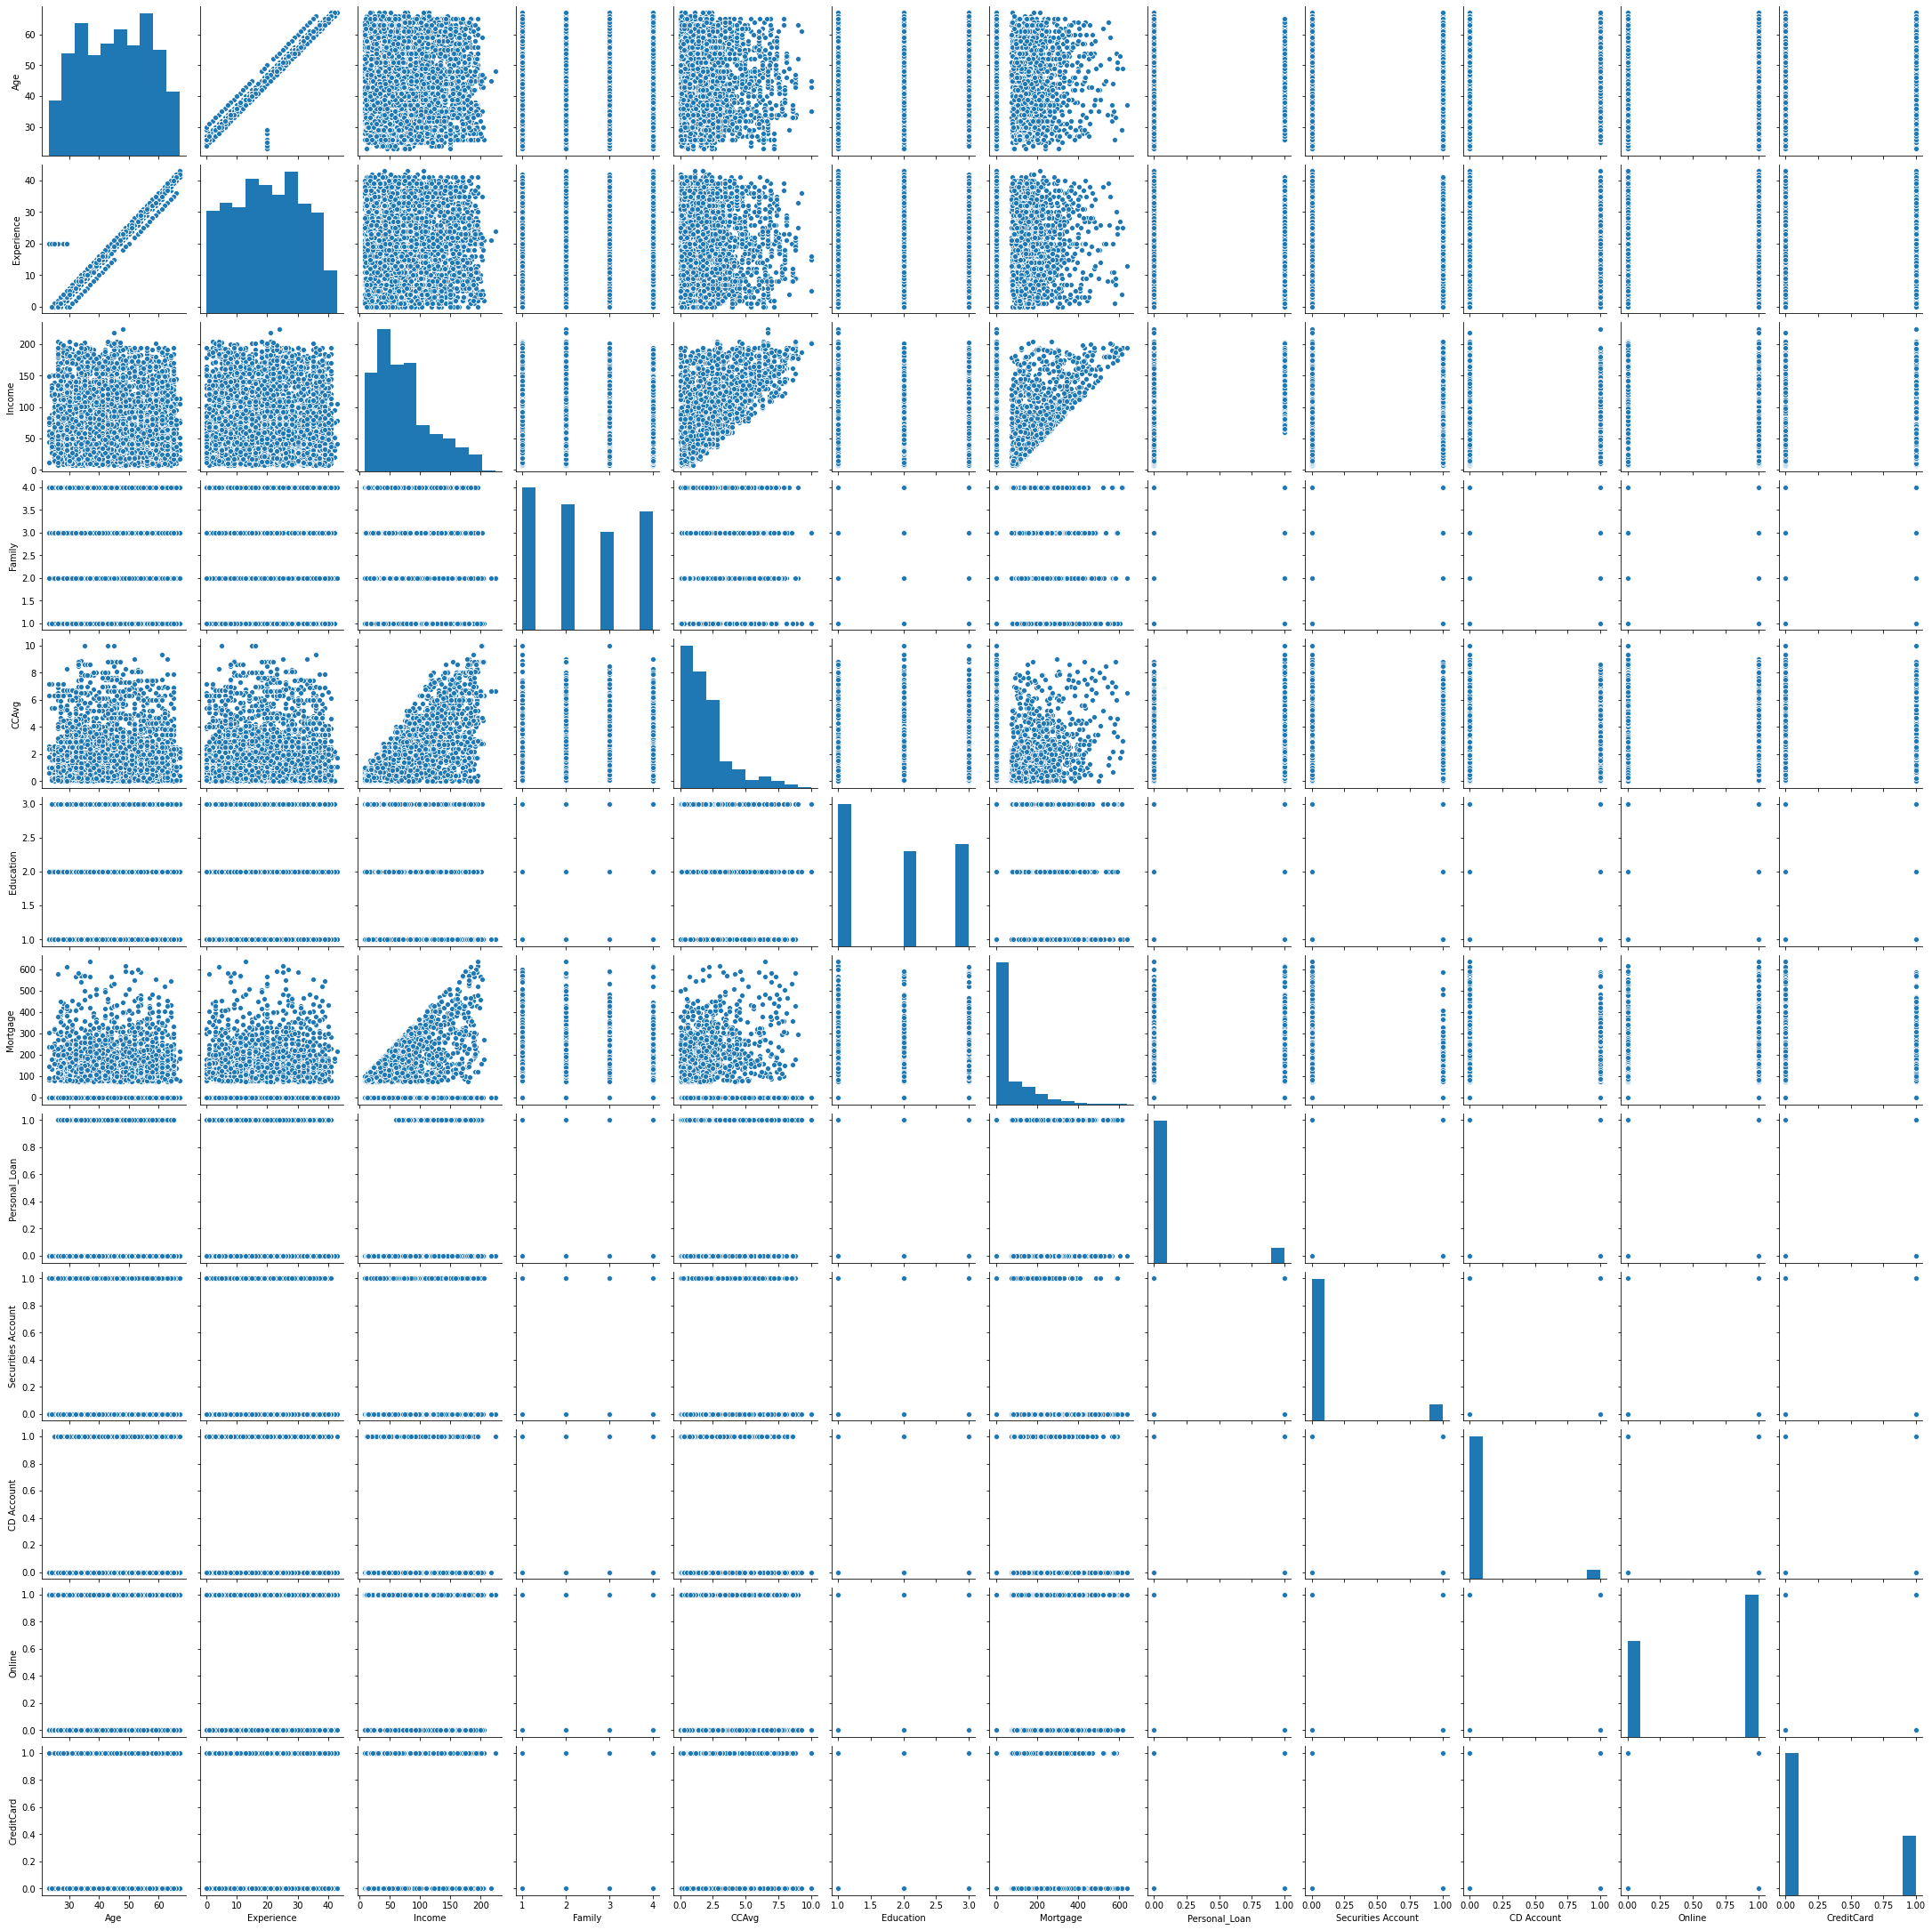

In [ ]:
sns.pairplot(Dataset)
plt.show()

Text(0.5, 1.0, 'Credit Card Distribution')

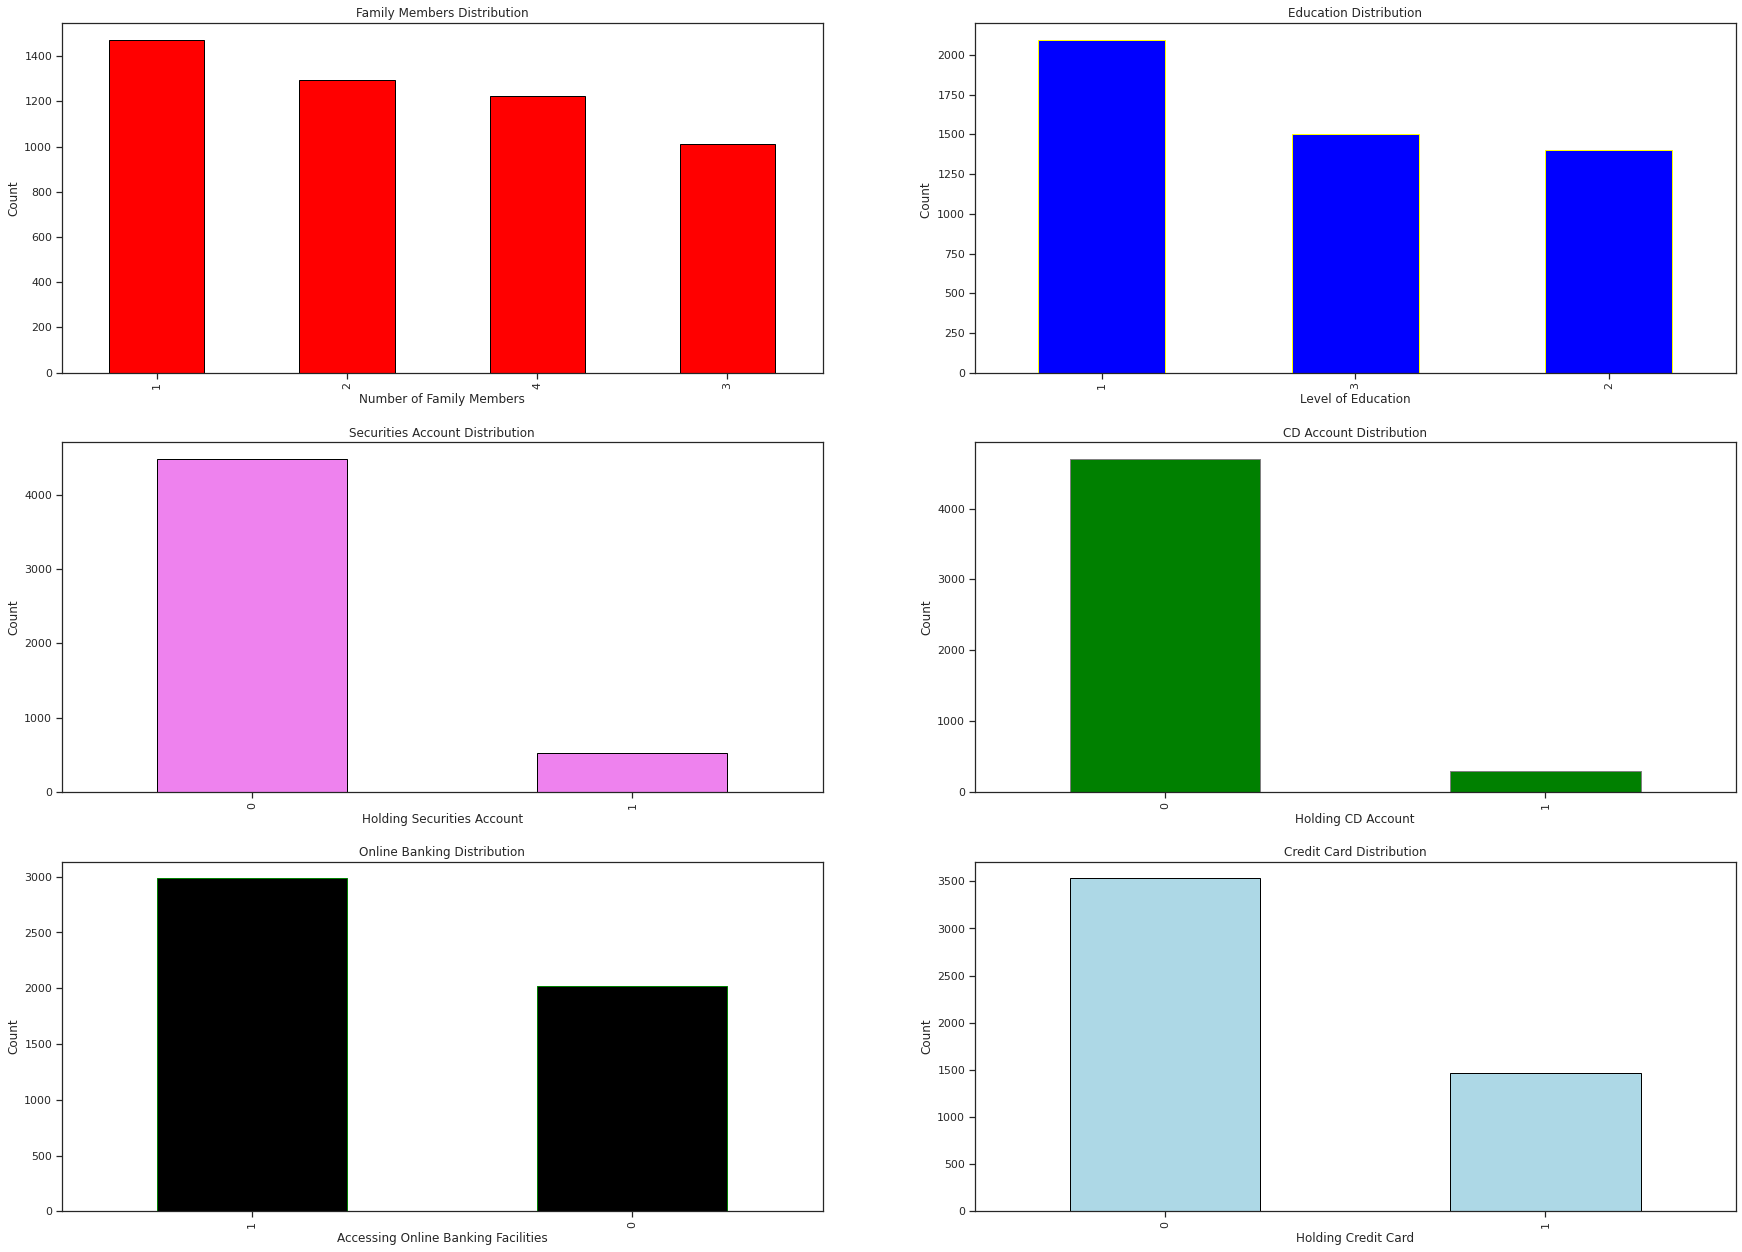

In [ ]:
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
Dataset['Family'].value_counts().plot(kind="bar", align='center',color = 'red',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
Dataset['Education'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'yellow')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
Dataset['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
Dataset['CD Account'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'grey')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
Dataset['Online'].value_counts().plot(kind="bar", align='center',color = 'black',edgecolor = 'green')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
Dataset['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

# **Apply necessary transformations for the feature variables**

# **Observation**
 
# **Checking for Skewness of data**

In [ ]:
# Checking for Skewness of data

import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(Dataset.Mortgage),stats.skew(Dataset.Income),stats.skew(Dataset.CCAvg),stats.skew(Dataset.Experience)
                                      ,stats.skew(Dataset.Age)]},index=['Mortgage','Income','CCAvg','Experience','Age'])
Skewness

,Skewness
Mortgage,2.103371
Income,0.841086
CCAvg,1.597964
Experience,-0.026317
Age,-0.029332


# **Observation**

# **Income, Credit card Average & Mortgage are highly skewed**


# yeo-johnson method

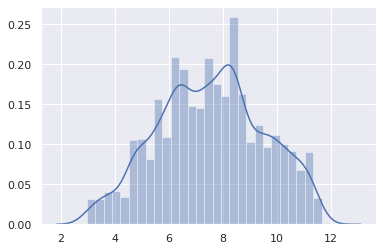

In [ ]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(Dataset['Income'].values.reshape(-1,1))
custom_income = pt.transform(Dataset['Income'].values.reshape(-1,1))
sns.distplot(custom_income);

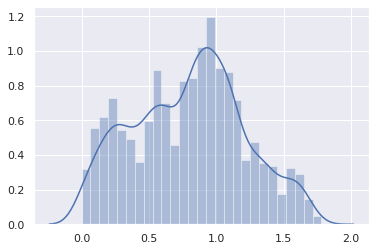

In [ ]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(Dataset['CCAvg'].values.reshape(-1,1))
custom_ccavg = pt.transform(Dataset['CCAvg'].values.reshape(-1,1))
sns.distplot(custom_ccavg);

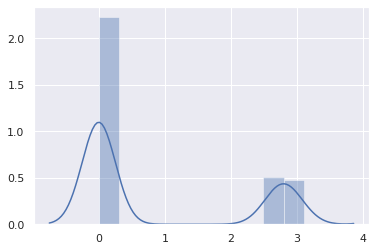

In [ ]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(Dataset['CCAvg'].values.reshape(-1,1))
custom_mortgage = pt.transform(Dataset['Mortgage'].values.reshape(-1,1))
sns.distplot(custom_mortgage);

# Histographs method

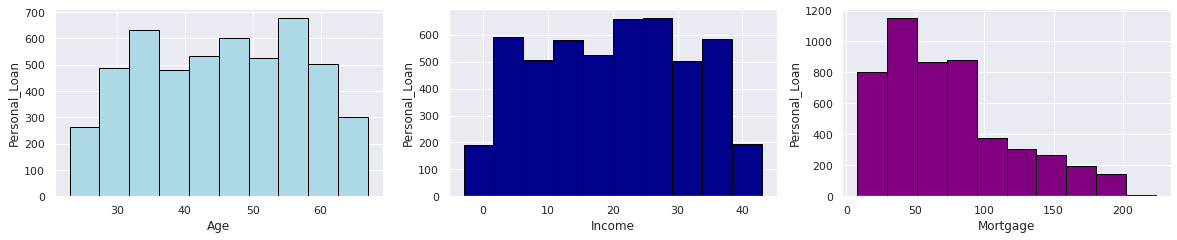

In [ ]:
plt.figure(figsize= (20,20))
plt.subplot(5,3,1)
plt.hist(Dataset.Age, color='lightblue', edgecolor = 'black')
plt.ylabel('Personal_Loan')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(Dataset.Experience, color='darkblue', edgecolor = 'black')
plt.ylabel('Personal_Loan')
plt.xlabel('Income')

plt.subplot(5,3,3)
plt.hist(Dataset.Income, color='purple', edgecolor = 'black')
plt.ylabel('Personal_Loan')
plt.xlabel('Mortgage')


plt.show()

# **To check how many user are buying personal loan**

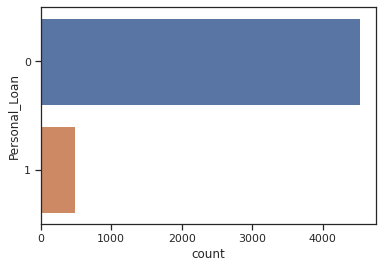

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='Personal_Loan', data=Dataset)

In [ ]:
Dataset["Personal_Loan"].value_counts().to_frame()

,Personal_Loan
0,4520
1,480


#**From the above Picture, We can say that the data is imbalanced**

# **violin plot:**

# voilin plots also like box plots, but these give pdf along with box plots in it. they look a voilin

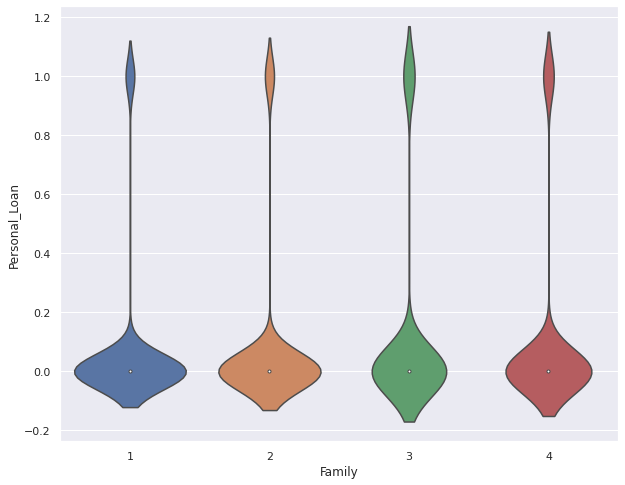

In [ ]:
sns.violinplot(x="Family",y="Personal_Loan",data= Dataset,size='8')
plt.show()

# Box plot method

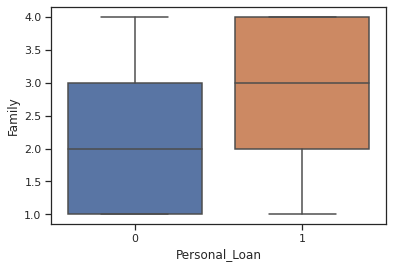

In [ ]:
sns.boxplot(x='Personal_Loan',y='Family', data=Dataset)

# Count plot method

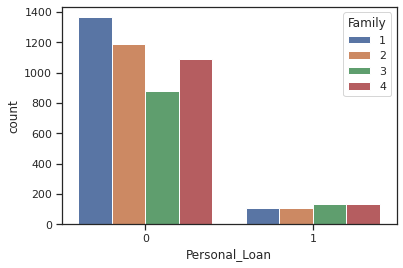

In [ ]:
sns.countplot(x='Personal_Loan',hue='Family',data=Dataset)

# Pie graphs method

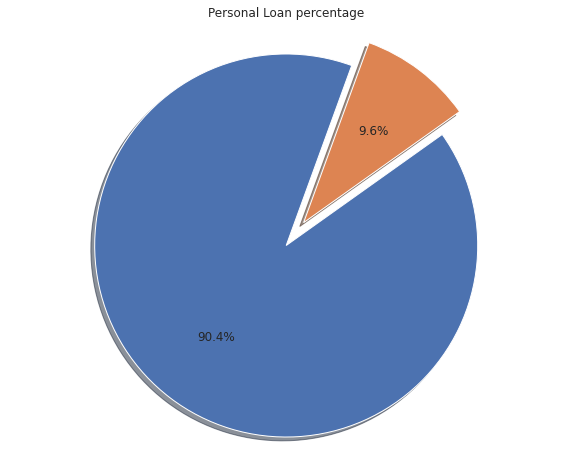

In [ ]:
Pie_graph = pd.DataFrame(Dataset["Personal_Loan"].value_counts().reset_index())
Pie_graph.columns =["Label","Personal_Loan"]
figl, axl = plt.subplots(figsize=(10,8))
explode = (0,0.15)
axl.pie(tempDF["Personal_Loan"], explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
axl.axis('equal')
plt.title("Personal Loan percentage")
plt.show()

# **CDF(cummulative distributive function), PDF(probability denstiy funtion):**

pdf= [0.3366 0.2752 0.2078 0.0638 0.0438 0.0194 0.0264 0.0168 0.009  0.0012]
bin_edges=  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
cdf= [0.3366 0.6118 0.8196 0.8834 0.9272 0.9466 0.973  0.9898 0.9988 1.    ]


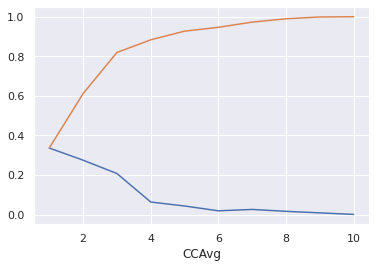

In [ ]:
count,bin_edges = np.histogram(Dataset['CCAvg'],bins=10, density = True)
plt.xlabel('CCAvg')
pdf = count/(sum(count))
print("pdf=",pdf);
print("bin_edges= ",bin_edges);
cdf = np.cumsum(pdf)
print("cdf=",cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

# **Observation**

# The graph show persons who have personal loan have a higher credit card average.
 
# It is clearly visible that as the members of family increases  the necessity of loan is also increasing.
 
# It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

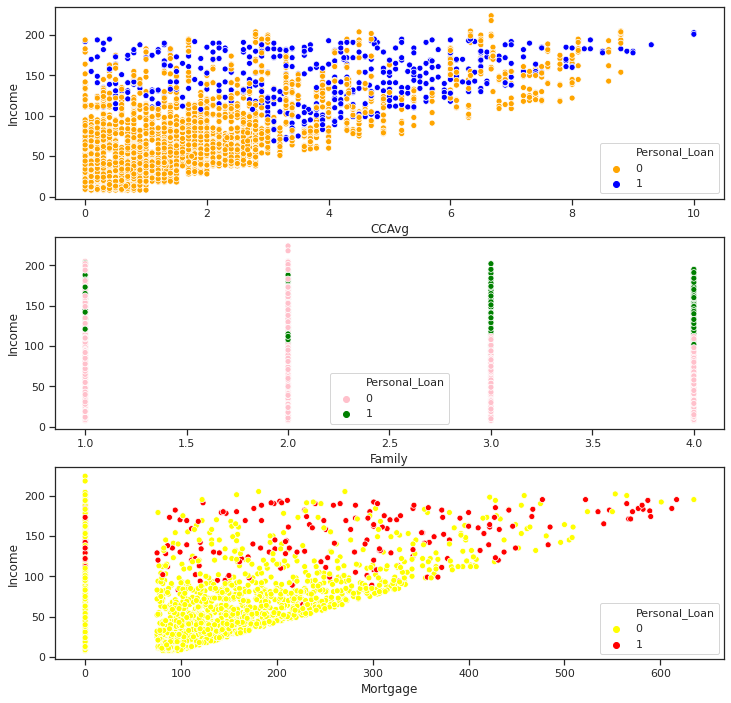

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
sns.scatterplot(Dataset.CCAvg, Dataset.Income, hue = Dataset['Personal_Loan'], palette= ['orange','blue'])

plt.subplot(3,1,2)
sns.scatterplot(Dataset.Family, Dataset.Income, hue = Dataset['Personal_Loan'], palette= ['pink','green'])

plt.subplot(3,1,3)
sns.scatterplot(Dataset.Mortgage, Dataset.Income, hue = Dataset['Personal_Loan'], palette= ['yellow','red'])

pdf= [0.0524 0.0974 0.1264 0.0958 0.1064 0.12   0.1048 0.1356 0.1008 0.0604]
bin_edges=  [23.  27.4 31.8 36.2 40.6 45.  49.4 53.8 58.2 62.6 67. ]
cdf= [0.0524 0.1498 0.2762 0.372  0.4784 0.5984 0.7032 0.8388 0.9396 1.    ]


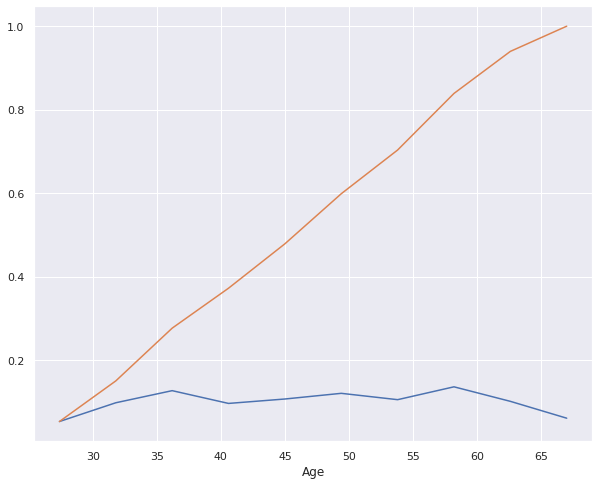

In [ ]:
count,bin_edges = np.histogram(Dataset['Age'],bins=10, density = True)
plt.xlabel('Age')
pdf = count/(sum(count))
print("pdf=",pdf);
print("bin_edges= ",bin_edges);
cdf = np.cumsum(pdf)
print("cdf=",cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

# **Receiver Operating Characteristic (ROC) Curve**

# ROC curve is a commonly used tool to evaluate binary classifier. It is used to compare different models. ROC curve has False Positive Rate or X-axis and True Positive Rate on Y-axis. 


In [ ]:
from __future__ import division
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X, y = make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

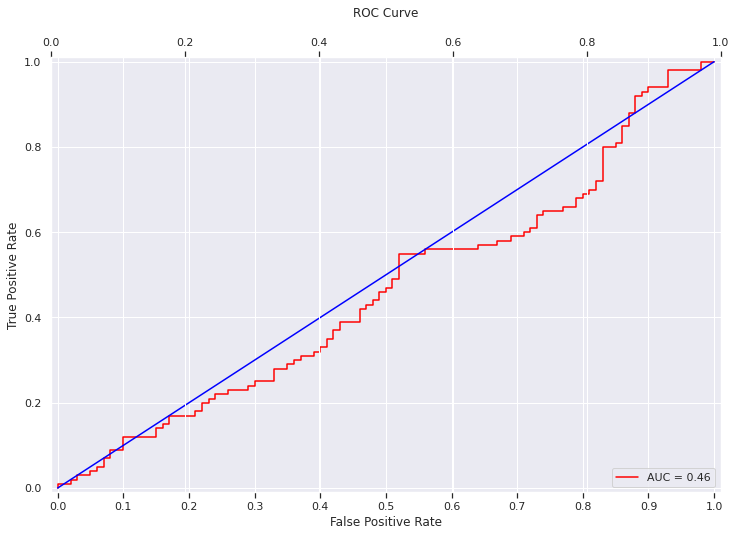

In [ ]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.metrics import auc, roc_curve

fig = plt.figure(figsize=(12, 8))
values = []
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

def plot_roc(y_Test, clf):
    y_pred = clf.predict_proba(X_Test)[:, 1]
    fpr, tpr, ths = roc_curve(y_Test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")
    plt.show()

plot_roc(y_test, clf)

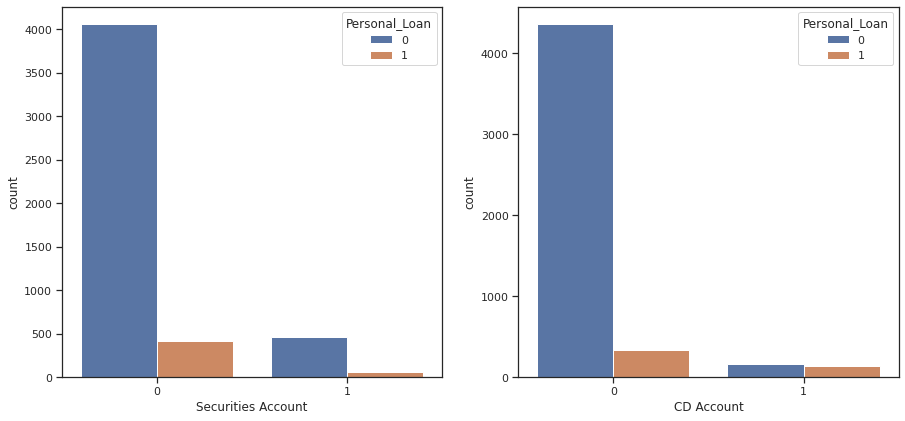

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=Dataset ,hue="Personal_Loan")
plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=Dataset ,hue='Personal_Loan')

# **Observation**

# Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
# Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well

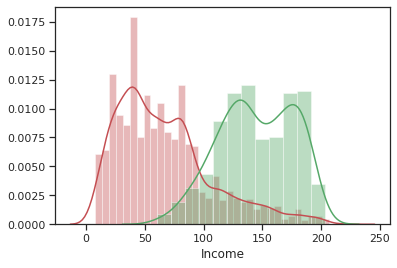

In [ ]:
sns.distplot(Dataset[Dataset["Personal_Loan"] == 0]['Income'], color = 'r')
sns.distplot(Dataset[Dataset["Personal_Loan"] == 1]['Income'], color = 'g')

Observation

The graph show those who have personal loan also have a higher income.

# **Observation**

# 'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
# It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
# Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

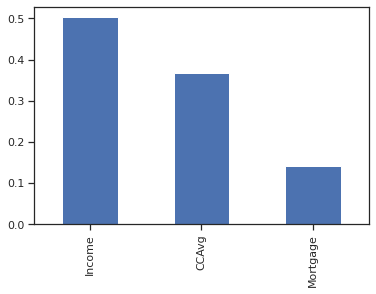

In [ ]:
Dataset[['Personal_Loan', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal_Loan'][1:].plot.bar()

# **Observation**

# The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

# **Splitting into train and test data**

In [ ]:
X = Dataset.drop('Personal_Loan',axis = 1).values
y = Dataset['Personal_Loan'].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train = scaler.fit_transform(X_Train)

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_Train)
X_Train = pca.fit_transform(X_Train)

In [ ]:
X_Train.shape

(800, 20)

# **Logistic Regression**

In [ ]:
train_set, test_set = train_test_split(Dataset.drop(['Experience'], axis=1), test_size=0.3 , random_state=15)

In [ ]:
train_labels = train_set.pop('Personal_Loan')
test_labels = test_set.pop('Personal_Loan')

In [ ]:
train_set_indep = Dataset.drop(['Experience' ] , axis = 1).drop(labels= "Personal_Loan" , axis = 1)
train_set_dep = Dataset["Personal_Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test= Y[3501:, ]

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Train**

In [ ]:
predict = logmodel.predict(X_Train)
predictProb = logmodel.predict_proba(X_Train)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(Y_Train,predict))


0.9357142857142857


# **Classification Report**

In [ ]:
print(classification_report(Y_Train, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3146
           1       0.77      0.52      0.62       354

    accuracy                           0.94      3500
   macro avg       0.86      0.75      0.79      3500
weighted avg       0.93      0.94      0.93      3500



# **Test**

In [ ]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

In [ ]:
print(metrics.accuracy_score(Y_Test,predict))

0.9419613075383589


# **Classification Report**

In [ ]:
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1373
           1       0.73      0.49      0.59       126

    accuracy                           0.94      1499
   macro avg       0.84      0.74      0.78      1499
weighted avg       0.94      0.94      0.94      1499



# **Confusion Matrix**

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


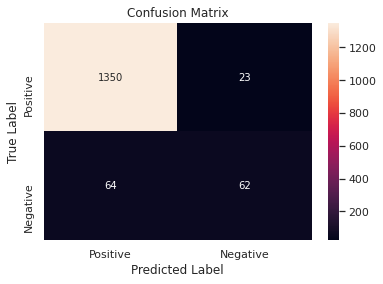

In [ ]:
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **KNN Algorithm**

# Creating odd list of K for KNN

In [ ]:
myList = list(range(1,20))


# Subsetting just the odd ones

In [ ]:
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    
    # Predict the response
    Y_Pred = knn.predict(X_Test)
    
    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

#**Train**

In [ ]:
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Train)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Train, predicted)
print(acc)


0.8988571428571429


# Classification Report

In [ ]:
print(classification_report(Y_Train, predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3146
           1       0.00      0.00      0.00       354

    accuracy                           0.90      3500
   macro avg       0.45      0.50      0.47      3500
weighted avg       0.81      0.90      0.85      3500



#**Test**

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)



0.9159439626417611


# Classification Report

In [ ]:
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1373
           1       0.00      0.00      0.00       126

    accuracy                           0.92      1499
   macro avg       0.46      0.50      0.48      1499
weighted avg       0.84      0.92      0.88      1499



#Ploting Misclassification Error

Text(0, 0.5, 'Misclassification Error')

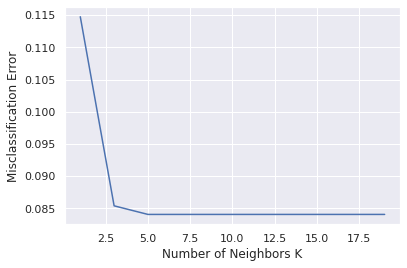

In [ ]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')



# **Confusion Matrix**

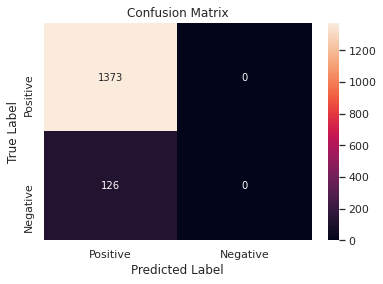

In [ ]:
cm1 = confusion_matrix(Y_Test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Naive Bayes**

#**Train**

In [ ]:
naive_model = GaussianNB()
naive_model.fit(X_Train, Y_Train)

prediction = naive_model.predict(X_Train)
naive_model.score(X_Train,Y_Train)

0.8842857142857142

# Classification Report

In [ ]:
print(classification_report(Y_Train, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3146
           1       0.45      0.59      0.51       354

    accuracy                           0.88      3500
   macro avg       0.70      0.76      0.72      3500
weighted avg       0.90      0.88      0.89      3500



# **Test**

In [ ]:
naive_model = GaussianNB()
naive_model.fit(X_Train, Y_Train)

prediction = naive_model.predict(X_Test)
naive_model.score(X_Test,Y_Test)

0.8839226150767178

# **Classification Report**

In [ ]:
print(classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1373
           1       0.37      0.52      0.43       126

    accuracy                           0.88      1499
   macro avg       0.66      0.72      0.68      1499
weighted avg       0.90      0.88      0.89      1499



# **Confusion Matrix**

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


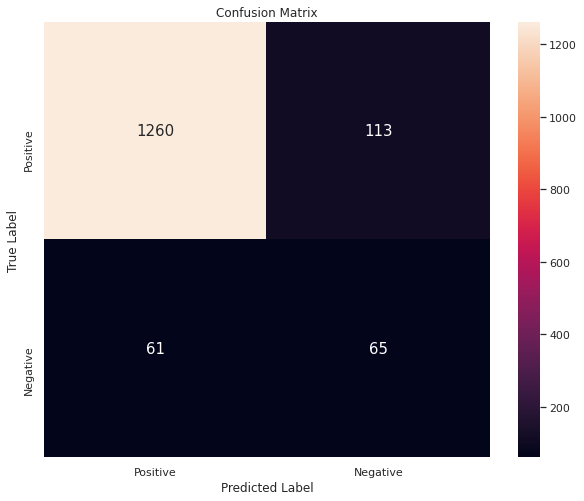

In [ ]:
cm1 = confusion_matrix(Y_Test, prediction)
class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# **Decision Tree**

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=12)

#**Train**

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=12)
model = decisiontree.fit(X_Train, Y_Train)

prediction = model.predict(X_Train)
model.score(X_Train,Y_Train)

0.9997142857142857

# Classification Report

In [ ]:
print(classification_report(Y_Train, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3146
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



#**Test**

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=0,max_depth=12)
model = decisiontree.fit(X_Train, Y_Train)

prediction = model.predict(X_Test)
model.score(X_Test,Y_Test)

0.9859906604402935

# Classification Report

In [ ]:
rint(classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1373
           1       0.93      0.90      0.91       126

    accuracy                           0.99      1499
   macro avg       0.96      0.95      0.95      1499
weighted avg       0.99      0.99      0.99      1499



# **Confusion Matrix**

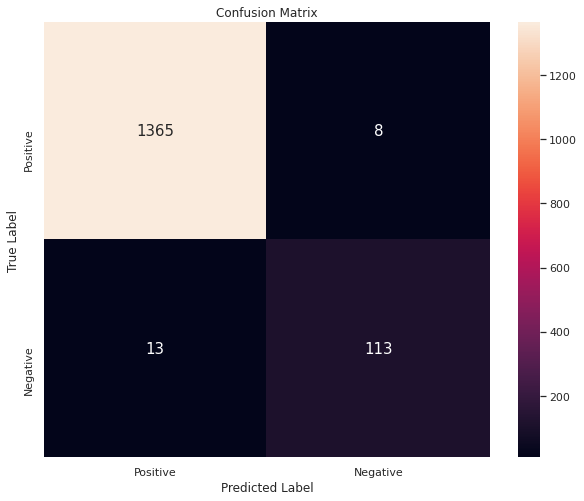

In [ ]:
cm2 = confusion_matrix(Y_Test, prediction)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Random Forest**

#**Train**

In [ ]:
randomforest = RandomForestClassifier(random_state=0,max_depth=8)
model = randomforest.fit(X_Test, Y_Test)

prediction = model.predict(X_Train)
model.score(X_Train,Y_Train)

0.984

# Classification Report

In [ ]:
print(classification_report(Y_Train, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3146
           1       0.98      0.86      0.92       354

    accuracy                           0.98      3500
   macro avg       0.98      0.93      0.95      3500
weighted avg       0.98      0.98      0.98      3500



#**Test**

In [ ]:
randomforest = RandomForestClassifier(random_state=0,max_depth=8)
model = randomforest.fit(X_Test, Y_Test)

prediction = model.predict(X_Test)
model.score(X_Test,Y_Test)

0.9986657771847899

# Classification Report

In [ ]:
print(classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      0.98      0.99       126

    accuracy                           1.00      1499
   macro avg       1.00      0.99      1.00      1499
weighted avg       1.00      1.00      1.00      1499



# **Confusion Matrix**

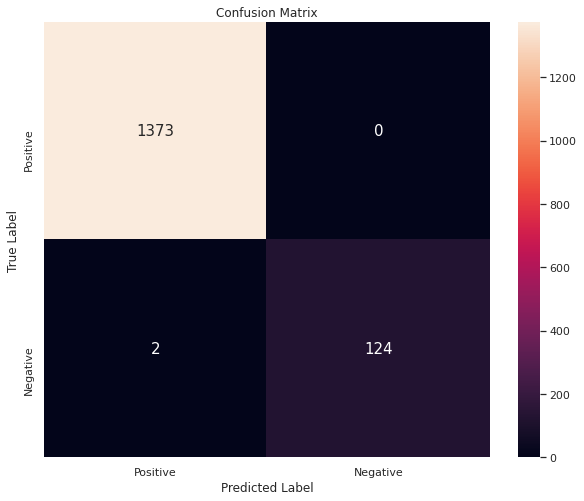

In [ ]:
cm3 = confusion_matrix(Y_Test, prediction)
class_label = ["Positive", "Negative"]
df_cm3 = pd.DataFrame(cm3, index = class_label, columns = class_label)
sns.heatmap(df_cm3, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **SVM**

#**Train**

In [ ]:
svm = SVC(random_state=0,max_iter=100)
model = svm.fit(X_Train, Y_Train)

prediction = model.predict(X_Train)
model.score(X_Train,Y_Train)

0.9048571428571428

# Classification Report

In [ ]:
print(classification_report(Y_Train, prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3146
           1       0.55      0.34      0.42       354

    accuracy                           0.90      3500
   macro avg       0.74      0.66      0.69      3500
weighted avg       0.89      0.90      0.90      3500



#**Test**

In [ ]:
svm = SVC(random_state=0,max_iter=12)
model = svm.fit(X_Test, Y_Test)

prediction = model.predict(X_Test)
model.score(X_Test,Y_Test)

0.8799199466310874

# Classification Report

In [ ]:
print(classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1373
           1       0.35      0.52      0.42       126

    accuracy                           0.88      1499
   macro avg       0.65      0.72      0.68      1499
weighted avg       0.90      0.88      0.89      1499



# **Confusion Matrix**

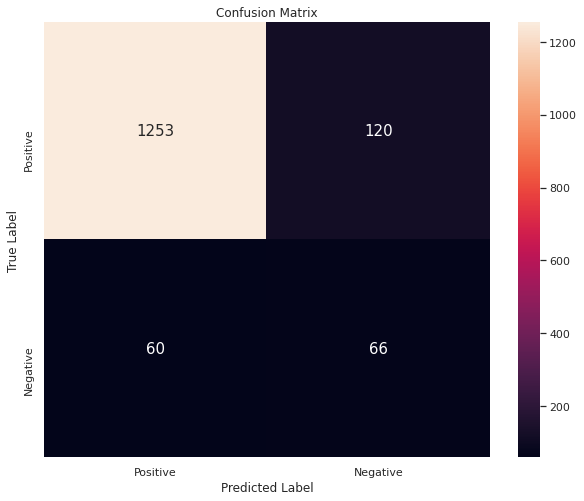

In [ ]:
cm4 = confusion_matrix(Y_Test, prediction)
class_label = ["Positive", "Negative"]
df_cm4 = pd.DataFrame(cm4, index = class_label, columns = class_label)
sns.heatmap(df_cm4, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **AdaBoost**

In [ ]:
adaboost=AdaBoostClassifier(random_state=0,n_estimators=500)

#**Train**

In [ ]:
model = adaboost.fit(X_Train, Y_Train)

prediction = model.predict(X_Train)
model.score(X_Train,Y_Train)

0.9797142857142858

# Classification Report

In [ ]:
print(classification_report(Y_Train, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3146
           1       0.93      0.86      0.90       354

    accuracy                           0.98      3500
   macro avg       0.96      0.93      0.94      3500
weighted avg       0.98      0.98      0.98      3500



#**Test**

In [ ]:
adaboost=AdaBoostClassifier(random_state=0,n_estimators=100)
model = adaboost.fit(X_Test, Y_Test)

prediction = model.predict(X_Test)
model.score(X_Test,Y_Test)

0.9866577718478986

# Classification Report

In [ ]:
print(classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1373
           1       0.96      0.88      0.92       126

    accuracy                           0.99      1499
   macro avg       0.97      0.94      0.96      1499
weighted avg       0.99      0.99      0.99      1499



# **Confusion Matrix**

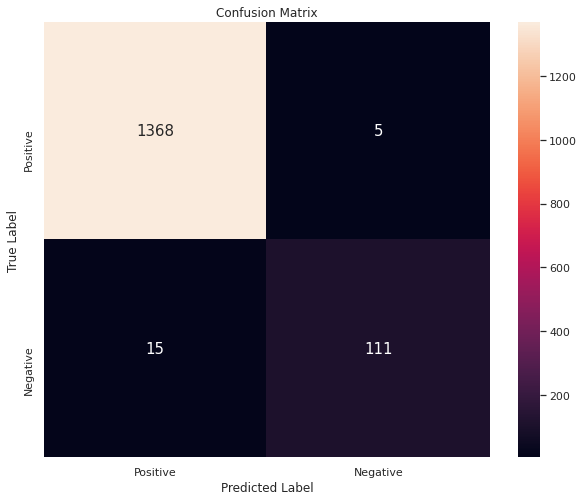

In [ ]:
cm6 = confusion_matrix(Y_Test, prediction)
class_label = ["Positive", "Negative"]
df_cm6 = pd.DataFrame(cm6, index = class_label, columns = class_label)
sns.heatmap(df_cm6, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Comparion of diffrent types of algorithm**

#Bascially in this step we have compare diffrent type of algorithm like KNN,Logic Regression,Navive Bayes,Decision Tree,Random Forest,Kernal SVM and AdaBoost . We will check which algorithm is perfect for the bank and which give most accuracy and least loss to the company.

Logic Reg: 0.943000 (0.009930)
KNN: 0.911200 (0.011461)
Naive Bayes: 0.883000 (0.011567)
Decision Tree  : 0.983400 (0.002538)
Random Forest: 0.985600 (0.004800)
Kernel SVM: 0.684200 (0.156832)
AdaBoost: 0.968600 (0.007645)


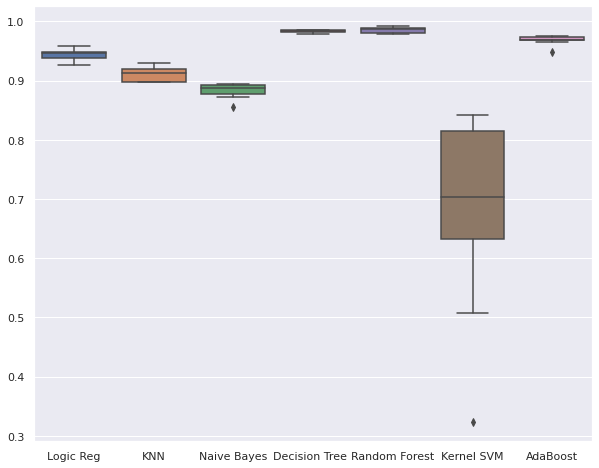

In [ ]:
models = []
models.append(('Logic Reg', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=k)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree  ', DecisionTreeClassifier(random_state=0,max_depth=12)))
models.append(('Random Forest', RandomForestClassifier(random_state=0,max_depth=8)))
models.append(('Kernel SVM', SVC(random_state=0,max_iter=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=0,n_estimators=500)))
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#plt.boxplot(results)
#ax.set_xticklabels(names)
#plt.show()

# **Business understanding of my model**

In my model I checked the data of bank , which the bank has provided to me in that the customers who has taken the personal loan are 480 out of 5000.
 	
   **Personal loan**
---
    0     4520
    1      480

So I had made a model for the company that will help the bank for getting the accurate result of how they can increase there personal loan customers. As the personal loan is totally dependent on three criteria
*   Family : 
As per the graph that as the members of family increases  the necessity of loan is also changes so we can say as family member increases then chancing of taking personal loan also changes.

    **Family**
---
     1 	1472
     2 	1296
     4 	1222
     3 	1010
*   Credit card Average : The graph show persons who have personal loan have a higher credit card average.This means that the customers who has more credit card ussage they also take loan .

    **CCAverage**
---
     0         106
     1        4894


*   Mortgage : It is very precise that as the income increases  the mortgage value also increases gradually wiht the necessity of personal loan.

    **Mortgage**
---
       0      3462
       1      1538    

Models
Bascially i have used 8 diffrent types of models or algorithms for understanding and giving the best and suitable model for the bank which will show and help them for better understanding of the personal loan problem



**********



**1. Logistic Regression Algorithm**

It is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous.

--- 

        Train      0.9357142857142857
        Test       0.9419613075383589
        Confusion matrix     1350 , 64
        precision  0.73  
        recall     0.49 
        f1-score   0.59
        accuracy   0.94    
  

**2.KNN Algorithm**

It is one of the simplest classification algorithm and it is one of the most used learning algorithms. It is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point



---
     Train       0.8988571428571429
     Test        0.9159439626417611
     Confusion matrix    1373, 126
     precision   0.0  
     recall      0.0 
     f1-score    0.0
     accuracy    0.92
  


**3.Naive Bayes classifiers**

It  is a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

---
     Train         0.8842857142857142
     Test          0.8839226150767178
     Confusion matrix  1260,61
     precision     0.37
     recall        0.52
     f1-score      0.43
     accuracy      0.88




**4.Decision Tree** 

It is a flowchart-like structure in which each internal node represents a test on a feature each leaf node represents a class label and branches represent conjunctions of features that lead to those class.



---

       Train        0.9997142857142857
       Test         0.9859906604402935
       Confusion Matrix  1364 ,13
       precision    0.93
       recall       0.90
       f1-score     0.91 
       accuracy     0.99   


**5.Random Forest**

It is a supervised learning algorithm which is used for both classification as well as regression. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.



---
      Train       0.984
      Test        0.9986657771847899
      Confusion Matrix 1373,2
      precision   1.00 
      recall      0.98
      f1-score    0.99
      accuracy    1.00  

**6.SVM**

It is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.



---
     Train       0.9048571428571428
     Test        0.8799199466310874
     Confusion Matrix  1253,60
     precision   0.35
     recall      0.52
     f1-score    0.42
     accuracy    0.88    




**7.AdaBoost**

It is a machine learning meta-algorithm. It can be used in conjunction with many other types of learning algorithms to improve performance.



---
 
     Train       0.9797142857142858
     Test        0.9866577718478986
     Confusion Matrix  1368,15
     accuracy    0.99 
     precision   0.96
     recall      0.88   
     f1-score    0.92    
           


# **By checking the different model and comparing them I get to know that Decision Tree and Random Forest are better than other model specially from logistic regression as Decision tree has good accuracy and has good confusion matrix if you see from 1372 only 2 customer will not take loan which is a good for the bank**